In [1]:
import csv
import json
import pandas as pd
from datetime import datetime
import numpy as np
from collections import Counter


import warnings
warnings.filterwarnings("ignore")


localFolder = "../data_2019_processed/"
baseFolder = "../../Dataset_ECUADOR_2019/"

In [2]:
# Dataframe of all datasets
# initialize list of lists
datasets = [['0Jf4TH9Zzse0Z1Jjh7SnTOe2MMzeSnFi7feTnkG6vgs'],
            ['0tdmm6rwW3KquQ73ATYYJ5JkpMtvbppJ0VzA2GExdA'], 
            ['2cyV53lVyUtlMj0BRwilEWtYJwUiviYoL48cZBPBq0'], 
            ['2J22RukYnEbKTk7t+iUVDBkorcyL5NKN6TrLe89ys'], 
            #['5FLZBTVAPwdq9QezHE2sVCJIs7p+r6mCemA2gp9jATk'], #does not have the file
            ['7EYF5I04EVqisUJCVNHlqn77UAuOmwL2Dahxd3cA'], 
            ['a9Qgj8ENWrHvl9QqlXcIPKmyGMKgbfHk9Dbqon1HQP4'], 
            ['ae4JJBZDycEcY8McJF+3BxyvZ1619y03BNdCxzpZTc'], 
            ['Ch3u5Oaz96VSrQbf0z31X6jEIbeIekkC0mwPzCdeJ1U'], 
            ['CH8f0yZkZL13zWuE9ks1CkVJRVrr+jsGdUXHrZ6YeA'], 
            ['DHO1K4jgiwZJOfQTrxvKE2vn7hkjamigroGD5IaeRc'], 
            #['DHPqzSqSttiba1L3BD1cptNJPjSxZ8rXxF9mY3za6WA'], #does not have the file
            ['dQEFscjqnIlug8Tgq97JohhSQPG2DEOWJqS86wCrcY'], 
            ['HFvs2CohmhHte+AaCzFasjzegGzxZKPhkrX23iI6Xo'], 
            ['jgB9E8v3Z6PKdTRTCMAijBllA9YEMtrmHbe4qsbmJWw'], 
            ['JkY++R7E8myldLN3on6iQ78Ee78zCbrLuggfwGju3I'], 
            ['K4SLohf+TN1Ak8Dn8iE3Lme7rEMPISfppB2sXfHX8'], 
            ['oGaWetJJJEWHuvYdWYo826SQxfhCExVVQ2da8LE1Y7Q'], 
            ['pyt24oiDAHsmgWMvkFKz2fn2pwcHiXchd6KchLM'], 
            # ['PZCf1nfvhR+6fk+7+sPNMYOgb8BAMmtQtfoRS83Suc'], #does not have the file
            ['QUNCATForxzK0HHw46LrGOMWh0eVA8Y5XWEiUXX+cQ'], 
            ['rIl2UK9+bQ+tzpFdbJAdbBxEa5GbgrgC030yEaENLw'], 
            ['RoBW3cDOO9wWRMPO2twQff83MPc+OXn6gJ+a1DafreI'], 
            ['SH3kQeyd5volraxw8vOyhlowNqWBPr1IJ9URNXUL4'], 
            ['VVpwFNMrEglveh6MDN8lrRzTy5OwzglD4FURfM4A2is'], 
            ['Wa1mcNmbh66S7VS6GIzyfCFMD3SGhbtDQyFP1ywJEsw'], 
            ['XCKRE0BWRHxfP1kZIihgtT+jUjSp2GE8v5ZlhcIhVmA'], 
            ['YI5Y79K6GXqAUoGP6PNyII8WKlAoel4urDxWSVVOvBw'], 
            ['ypklj+8GJ15rOIH1lpKQtFJOuK+VdvyCuBPqhY3aoM'], 
            ['ZSsAZ0Pq+MCqFrnjsRFn5Ua09pMCVaOV9c8ZuYb7XQY']]
  
# Create the pandas DataFrame
folders = pd.DataFrame(datasets, columns=['folder'])

#folders

In [3]:
timestamp = 0
count_24_plus, count_12_24_plus, count_12_minus, count_0 = 0,0,0,0
# analyse the forms
allData = pd.DataFrame()
for indexFolder, folder in folders.iterrows():
   
    dataFLabel = pd.read_csv(localFolder+"form/sleep_form_"+folder['folder']+"_treated.csv",
                   delimiter=',', encoding="utf8")
    originalFLabel = pd.read_csv(baseFolder+folder['folder']+"/sleep_form_"+folder['folder']+".csv",
                   delimiter=',', encoding="utf8")
    
    count_24_plus = count_24_plus + dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0]
    count_12_24_plus = count_12_24_plus + (dataFLabel[dataFLabel['time_sleeping_hs'] > 12 ].shape[0]-dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0])
    count_12_minus = count_12_minus + dataFLabel[dataFLabel['time_sleeping_hs'] <= 12].shape[0]
    count_0 = count_0 + dataFLabel[dataFLabel['time_sleeping_hs'] <= 0].shape[0]
                                 
    print(folder['folder'])
    print("Original Count: ",originalFLabel.shape[0])
    print("New Count: ",dataFLabel.shape[0])
    print("Time sleep: ",dataFLabel['time_sleeping_hs'].max(),dataFLabel['time_sleeping_hs'].min(),dataFLabel['time_sleeping_hs'].mean())
    print("Sleep variability",)
    print("Count > 24:",dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0])
    print("Count <= 24 and > 12:",(dataFLabel[dataFLabel['time_sleeping_hs'] > 12 ].shape[0]-dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0]))
    print("Count <= 12:",dataFLabel[dataFLabel['time_sleeping_hs'] <= 12].shape[0])
    print("Count <= 0:",dataFLabel[dataFLabel['time_sleeping_hs'] <= 0].shape[0])
    print()  
    
        
                                  

0Jf4TH9Zzse0Z1Jjh7SnTOe2MMzeSnFi7feTnkG6vgs
Original Count:  33
New Count:  26
Time sleep:  20.75333333333333 2.5 6.80219017094017
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 2
Count <= 12: 24
Count <= 0: 0

0tdmm6rwW3KquQ73ATYYJ5JkpMtvbppJ0VzA2GExdA
Original Count:  31
New Count:  22
Time sleep:  22.50277777777778 2.5133333333333336 8.58574494949495
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 4
Count <= 12: 18
Count <= 0: 0

2cyV53lVyUtlMj0BRwilEWtYJwUiviYoL48cZBPBq0
Original Count:  48
New Count:  30
Time sleep:  16.0 1.0 5.175129629629629
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 1
Count <= 12: 29
Count <= 0: 0

2J22RukYnEbKTk7t+iUVDBkorcyL5NKN6TrLe89ys
Original Count:  50
New Count:  15
Time sleep:  20.001388888888886 4.0 8.023129629629628
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 1
Count <= 12: 14
Count <= 0: 0

7EYF5I04EVqisUJCVNHlqn77UAuOmwL2Dahxd3cA
Original Count:  15
New Count:  13
Time sleep:  9.750277777777775 3.262222222222222 6.

In [4]:
print("Status geral")
print("Count > 24:",count_24_plus)
print("Count <= 24 and > 12:",count_12_24_plus)
print("Count <= 12:",count_12_minus)
print("Count <= 0:",count_0)
print("total:",(count_0+count_12_minus+count_12_24_plus+count_24_plus))
print()  

Status geral
Count > 24: 0
Count <= 24 and > 12: 54
Count <= 12: 550
Count <= 0: 0
total: 604



In [4]:
dsMetrics = pd.read_csv("result_trad_MPL_unb_batch_size_32.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,MPL,16/8,5,32,-1,awake,0.839623,0.866946,0.948457,0.905872,0.371670,0.805503
1,MPL,16/8,5,32,-1,asleep,0.839623,0.618183,0.364392,0.458512,0.371670,0.805503
2,MPL,16/8,5,32,-1,avg,0.839623,0.742565,0.656425,0.682192,0.371670,0.805503
3,MPL,16/8,15,32,-1,awake,0.829562,0.859627,0.944812,0.900209,0.325410,0.781925
4,MPL,16/8,15,32,-1,asleep,0.829562,0.575216,0.326318,0.416409,0.325410,0.781925
5,MPL,16/8,15,32,-1,avg,0.829562,0.717422,0.635565,0.658309,0.325410,0.781925
6,MPL,16/8,30,32,-1,awake,0.839452,0.876911,0.933751,0.904439,0.405707,0.785792
7,MPL,16/8,30,32,-1,asleep,0.839452,0.596526,0.427690,0.498193,0.405707,0.785792
8,MPL,16/8,30,32,-1,avg,0.839452,0.736719,0.680721,0.701316,0.405707,0.785792
9,MPL,16/8,50,32,-1,awake,0.830941,0.874596,0.924831,0.899012,0.382809,0.761841


<AxesSubplot: xlabel='epochs'>

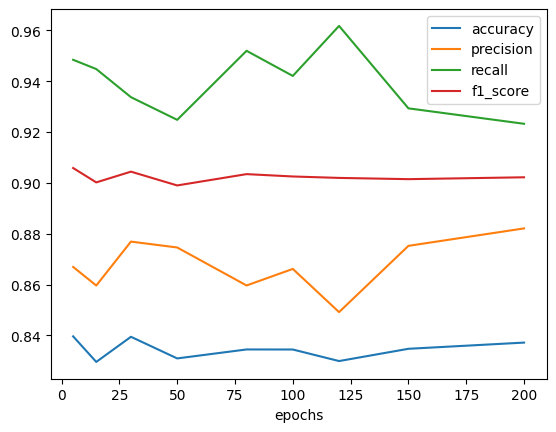

In [6]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "awake"]
lines = dfMetricsClass[metrics].plot.line(x='epochs')

lines

<AxesSubplot: xlabel='epochs'>

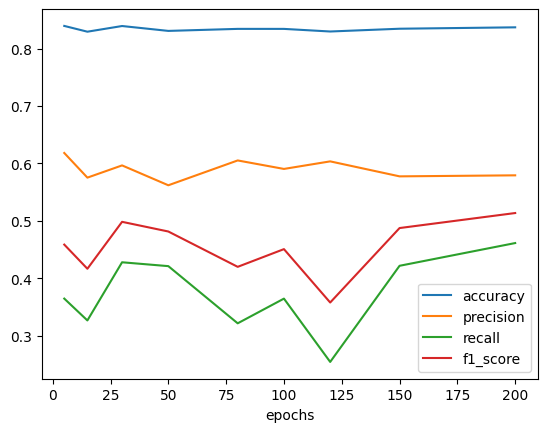

In [7]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
lines = dfMetricsClass[metrics].plot.line(x='epochs')

lines

<AxesSubplot: xlabel='epochs'>

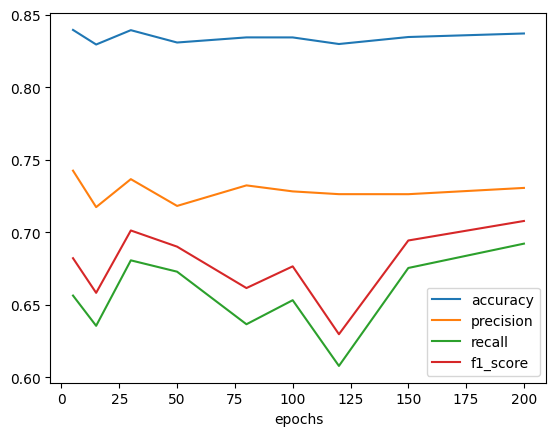

In [8]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "avg"]
lines = dfMetricsClass[metrics].plot.line(x='epochs')

lines

<AxesSubplot: xlabel='epochs'>

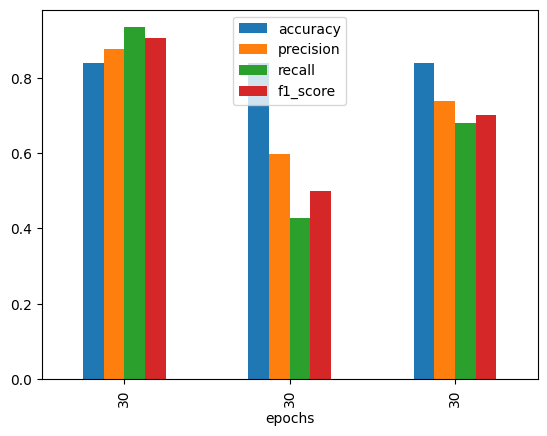

In [16]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['epochs'] == 30]
lines = dfMetricsClass[metrics].plot.bar(x='epochs')

lines

In [14]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
2,MPL,16/8,5,32,-1,-1,2023-09-25 14:03:13.164791,2023-09-25 14:04:41.594324,88.429533,1.473826,...,0.742565,0.656425,0.682192,0.37167,0.805503,NaN,NaN,NaN,NaN,NaN


In [15]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['cohen_kappa_score'] == ss['cohen_kappa_score'].max()]
ss1

,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
26,MPL,16/8,200,32,-1,-1,2023-09-25 16:35:57.884748,2023-09-25 17:31:34.169674,3336.284926,55.604749,...,0.730665,0.692231,0.707866,0.417239,0.791909,NaN,NaN,NaN,NaN,NaN


In [19]:
dsMetrics.iloc[6:9][metrics]

,epochs,accuracy,precision,recall,f1_score
6,30,0.839452,0.876911,0.933751,0.904439
7,30,0.839452,0.596526,0.427690,0.498193
8,30,0.839452,0.736719,0.680721,0.701316


In [20]:
dsMetrics = pd.read_csv("result_trad_MPL_smote_batch_size_32.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,MPL,16/8,5,32,-1,awake,0.828332,0.845209,0.965914,0.901539,0.254717,0.793038
1,MPL,16/8,5,32,-1,asleep,0.828332,0.604587,0.227571,0.330674,0.254717,0.793038
2,MPL,16/8,5,32,-1,avg,0.828332,0.724898,0.596743,0.616107,0.254717,0.793038
3,MPL,16/8,15,32,-1,awake,0.835960,0.859394,0.954571,0.904485,0.335079,0.810705
4,MPL,16/8,15,32,-1,asleep,0.835960,0.615871,0.318043,0.419467,0.335079,0.810705
5,MPL,16/8,15,32,-1,avg,0.835960,0.737632,0.636307,0.661976,0.335079,0.810705
6,MPL,16/8,30,32,-1,awake,0.832654,0.864398,0.942125,0.901589,0.349700,0.784662
7,MPL,16/8,30,32,-1,asleep,0.832654,0.583912,0.354645,0.441276,0.349700,0.784662
8,MPL,16/8,30,32,-1,avg,0.832654,0.724155,0.648385,0.671433,0.349700,0.784662
9,MPL,16/8,50,32,-1,awake,0.839563,0.881503,0.927501,0.903917,0.419968,0.782099


In [23]:
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
17,MPL,16/8,100,32,-1,-1,2023-09-23 19:49:44.118286,2023-09-23 20:16:57.961514,1633.843228,27.23072,...,0.741366,0.686107,0.706721,0.416272,0.796223,NaN,NaN,NaN,NaN,NaN


In [24]:
dsMetrics.iloc[15:18][metrics]

,class,epochs,accuracy,precision,recall,f1_score
15,awake,100,0.841728,0.878915,0.934179,0.905705
16,asleep,100,0.841728,0.603817,0.438035,0.507736
17,avg,100,0.841728,0.741366,0.686107,0.706721


In [26]:
dsMetrics = pd.read_csv("result_trad_LSTM_smote_batch_size_32_window_4-1.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM,128,5,32,4,awake,0.813655,0.813655,1.000000,0.897254,0.000000,0.784009
1,LSTM,128,5,32,4,asleep,0.813655,0.000000,0.000000,0.000000,0.000000,0.784009
2,LSTM,128,5,32,4,avg,0.813655,0.406827,0.500000,0.448627,0.000000,0.784009
3,LSTM,128,15,32,4,awake,0.813121,0.813932,0.998606,0.896861,0.002958,0.779338
4,LSTM,128,15,32,4,asleep,0.813121,0.346154,0.003223,0.006386,0.002958,0.779338
5,LSTM,128,15,32,4,avg,0.813121,0.580043,0.500914,0.451624,0.002958,0.779338
6,LSTM,128,30,32,4,awake,0.821224,0.828458,0.984036,0.899570,0.137972,0.794441
7,LSTM,128,30,32,4,asleep,0.821224,0.612818,0.110324,0.186986,0.137972,0.794441
8,LSTM,128,30,32,4,avg,0.821224,0.720638,0.547180,0.543278,0.137972,0.794441
9,LSTM,128,50,32,4,awake,0.809488,0.816185,0.988474,0.894105,0.025505,0.780871


In [27]:
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
20,LSTM,128,120,32,4,1,2023-09-23 09:09:58.137628,2023-09-23 11:40:17.367598,9019.22997,150.320499,...,0.723013,0.55931,0.563175,0.169073,0.78912,NaN,NaN,NaN,NaN,NaN


In [28]:
dsMetrics.iloc[15:18][metrics]

,class,epochs,accuracy,precision,recall,f1_score
15,awake,100,0.81324,0.822750,0.982032,0.895362
16,asleep,100,0.81324,0.492798,0.076228,0.132033
17,avg,100,0.81324,0.657774,0.529130,0.513698


In [32]:
dsMetrics = pd.read_csv("result_trad_LSTM_unb_batch_size_32_window_4-1.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM,128,5,32,4,awake,0.816539,0.816936,0.998205,0.898520,0.034347,0.778062
1,LSTM,128,5,32,4,asleep,0.816539,0.748404,0.023314,0.045220,0.034347,0.778062
2,LSTM,128,5,32,4,avg,0.816539,0.782670,0.510760,0.471870,0.034347,0.778062
3,LSTM,128,15,32,4,awake,0.814811,0.815196,0.998834,0.897720,0.016321,0.807791
4,LSTM,128,15,32,4,asleep,0.814811,0.689320,0.011299,0.022234,0.016321,0.807791
5,LSTM,128,15,32,4,avg,0.814811,0.752258,0.505066,0.459977,0.016321,0.807791
6,LSTM,128,30,32,4,awake,0.821625,0.828726,0.984173,0.899785,0.140365,0.794280
7,LSTM,128,30,32,4,asleep,0.821625,0.618158,0.111876,0.189462,0.140365,0.794280
8,LSTM,128,30,32,4,avg,0.821625,0.723442,0.548024,0.544624,0.140365,0.794280
9,LSTM,128,50,32,4,awake,0.814767,0.821827,0.986141,0.896517,0.079314,0.795984


In [35]:
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
17,LSTM,128,100,32,4,1,2023-09-25 02:02:49.693900,2023-09-25 04:08:34.174443,7544.480543,125.741342,...,0.74764,0.544557,0.537867,0.132497,0.791716,NaN,NaN,NaN,NaN,NaN


In [34]:
dsMetrics.iloc[15:18][metrics]

,class,epochs,accuracy,precision,recall,f1_score
15,awake,100,0.82307,0.827556,0.988537,0.900912
16,asleep,100,0.82307,0.667723,0.100577,0.174821
17,avg,100,0.82307,0.747640,0.544557,0.537867


In [37]:
dsMetrics = pd.read_csv("result_federated_LSTM_smote_batch_size_32_max_iteration_200_epochs_1.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics


Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,window_size,time_step,round_iteration,start_time,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,1,32,200,19,4,1,0,2023-09-22 14:58:39.359397,...,0.813655,1.000000,0.897254,0.000000,0.500000,0.0,0.0,25135.0,0.0,109749.0
1,LSTM,128,1,32,200,19,4,1,0,2023-09-22 14:58:39.359397,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,109749.0,0.0,25135.0,0.0
2,LSTM,128,1,32,200,19,4,1,0,2023-09-22 14:58:39.359397,...,0.406827,0.500000,0.448627,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,1,32,200,19,4,1,1,2023-09-22 14:59:23.347810,...,0.813655,1.000000,0.897254,0.000000,0.500000,0.0,0.0,25135.0,0.0,109749.0
4,LSTM,128,1,32,200,19,4,1,1,2023-09-22 14:59:23.347810,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,109749.0,0.0,25135.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,LSTM,128,1,32,200,19,4,1,198,2023-09-22 16:46:05.364601,...,0.427978,0.094331,0.154588,0.093578,0.532728,0.0,106580.0,3169.0,22764.0,2371.0
596,LSTM,128,1,32,200,19,4,1,198,2023-09-22 16:46:05.364601,...,0.625991,0.532728,0.523062,0.093578,0.532728,NaN,NaN,NaN,NaN,NaN
597,LSTM,128,1,32,200,19,4,1,199,2023-09-22 16:46:37.880237,...,0.825204,0.969795,0.891676,0.103306,0.536419,0.0,2590.0,22545.0,3315.0,106434.0
598,LSTM,128,1,32,200,19,4,1,199,2023-09-22 16:46:37.880237,...,0.438611,0.103044,0.166881,0.103306,0.536419,0.0,106434.0,3315.0,22545.0,2590.0


In [38]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
338,avg,112,1,0.826273,0.815338,0.542277,0.532131


In [42]:
ss.loc[ss['recall'] == ss['recall'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
338,avg,112,1,0.826273,0.815338,0.542277,0.532131


In [43]:
dsMetrics.iloc[336:339][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
336,awake,112,1,0.826273,0.826747,0.994998,0.903103
337,asleep,112,1,0.826273,0.803929,0.089556,0.161160
338,avg,112,1,0.826273,0.815338,0.542277,0.532131


In [44]:
dsMetrics = pd.read_csv("result_federated_LSTM_smote_batch_size_32_max_iteration_200_epochs_3.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,window_size,time_step,round_iteration,start_time,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,3,32,200,19,4,1,0,2023-09-22 16:47:51.895641,...,0.813655,1.000000,0.897254,0.000000,0.500000,0.0,0.0,25135.0,0.0,109749.0
1,LSTM,128,3,32,200,19,4,1,0,2023-09-22 16:47:51.895641,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,109749.0,0.0,25135.0,0.0
2,LSTM,128,3,32,200,19,4,1,0,2023-09-22 16:47:51.895641,...,0.406827,0.500000,0.448627,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,3,32,200,19,4,1,1,2023-09-22 16:49:05.746257,...,0.813655,1.000000,0.897254,0.000000,0.500000,0.0,0.0,25135.0,0.0,109749.0
4,LSTM,128,3,32,200,19,4,1,1,2023-09-22 16:49:05.746257,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,109749.0,0.0,25135.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,LSTM,128,3,32,200,19,4,1,198,2023-09-22 20:17:01.460108,...,0.588793,0.284265,0.383418,0.298265,0.619399,0.0,104759.0,4990.0,17990.0,7145.0
596,LSTM,128,3,32,200,19,4,1,198,2023-09-22 20:17:01.460108,...,0.721117,0.619399,0.642289,0.298265,0.619399,NaN,NaN,NaN,NaN,NaN
597,LSTM,128,3,32,200,19,4,1,199,2023-09-22 20:18:03.170947,...,0.854378,0.953175,0.901076,0.302728,0.621903,0.0,7305.0,17830.0,5139.0,104610.0
598,LSTM,128,3,32,200,19,4,1,199,2023-09-22 20:18:03.170947,...,0.587030,0.290631,0.388781,0.302728,0.621903,0.0,104610.0,5139.0,17830.0,7305.0


In [47]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

527    175
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
527,avg,175,3,0.833123,0.730241,0.629351,0.653875


In [48]:
dsMetrics.iloc[525:528][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
525,awake,175,3,0.833123,0.856950,0.954186,0.902958
526,asleep,175,3,0.833123,0.603533,0.304516,0.404791
527,avg,175,3,0.833123,0.730241,0.629351,0.653875


In [3]:
dsMetrics = pd.read_csv("result_federated_LSTM_smote_batch_size_32_max_iteration_200_epochs_5.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,window_size,time_step,round_iteration,start_time,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,5,32,200,19,4,1,0,2023-09-22 20:19:48.349838,...,0.813655,1.000000,0.897254,0.000000,0.500000,0.0,0.0,25135.0,0.0,109749.0
1,LSTM,128,5,32,200,19,4,1,0,2023-09-22 20:19:48.349838,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,109749.0,0.0,25135.0,0.0
2,LSTM,128,5,32,200,19,4,1,0,2023-09-22 20:19:48.349838,...,0.406827,0.500000,0.448627,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,5,32,200,19,4,1,1,2023-09-22 20:21:38.577405,...,0.813655,1.000000,0.897254,0.000000,0.500000,0.0,0.0,25135.0,0.0,109749.0
4,LSTM,128,5,32,200,19,4,1,1,2023-09-22 20:21:38.577405,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,109749.0,0.0,25135.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,LSTM,128,5,32,200,19,4,1,198,2023-09-23 01:23:11.231207,...,0.614222,0.294171,0.397816,0.315162,0.625928,0.0,105105.0,4644.0,17741.0,7394.0
596,LSTM,128,5,32,200,19,4,1,198,2023-09-23 01:23:11.231207,...,0.734903,0.625928,0.650788,0.315162,0.625928,NaN,NaN,NaN,NaN,NaN
597,LSTM,128,5,32,200,19,4,1,199,2023-09-23 01:24:41.644509,...,0.857229,0.957457,0.904575,0.325171,0.630589,0.0,7634.0,17501.0,4669.0,105080.0
598,LSTM,128,5,32,200,19,4,1,199,2023-09-23 01:24:41.644509,...,0.620499,0.303720,0.407821,0.325171,0.630589,0.0,105080.0,4669.0,17501.0,7634.0


In [4]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

551    183
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
551,avg,183,5,0.836193,0.738185,0.637019,0.662774


In [6]:
dsMetrics.iloc[549:552][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
549,awake,183,5,0.836193,0.859645,0.954524,0.904603
550,asleep,183,5,0.836193,0.616726,0.319515,0.420945
551,avg,183,5,0.836193,0.738185,0.637019,0.662774


In [54]:
dsMetrics = pd.read_csv("result_federated_LSTM_umb_batch_size_32_max_iteration_200_epochs_1.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
362    120
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
335,avg,111,1,0.823382,0.779052,0.537648,0.524615


In [58]:
dsMetrics.iloc[333:363][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
333,awake,111,1,0.823382,0.825315,0.993139,0.901483
334,asleep,111,1,0.823382,0.732789,0.082156,0.147748
335,avg,111,1,0.823382,0.779052,0.537648,0.524615
336,awake,112,1,0.823293,0.825249,0.993121,0.901436
337,asleep,112,1,0.823293,0.731317,0.081759,0.147075
338,avg,112,1,0.823293,0.778283,0.537440,0.524255
339,awake,113,1,0.822907,0.824885,0.993194,0.901249
340,asleep,113,1,0.822907,0.727571,0.079371,0.143129
341,avg,113,1,0.822907,0.776228,0.536282,0.522189
342,awake,114,1,0.821358,0.822948,0.994378,0.900578


In [8]:
dsMetrics = pd.read_csv("result_federated_LSTM_umb_batch_size_32_max_iteration_200_epochs_3.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
581    193
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
572,avg,190,3,0.83574,0.73908,0.630975,0.656631


In [9]:
dsMetrics.iloc[570:573][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
570,awake,190,3,0.83574,0.857368,0.957394,0.904624
571,asleep,190,3,0.83574,0.620793,0.304555,0.408637
572,avg,190,3,0.83574,0.739080,0.630975,0.656631


In [10]:
dsMetrics = pd.read_csv("result_federated_LSTM_umb_batch_size_32_max_iteration_200_epochs_5.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
599    199
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
584,avg,194,5,0.840767,0.748505,0.65052,0.677652


In [11]:
dsMetrics.iloc[582:585][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
582,awake,194,5,0.840767,0.864500,0.953795,0.906955
583,asleep,194,5,0.840767,0.632510,0.347245,0.448348
584,avg,194,5,0.840767,0.748505,0.650520,0.677652


In [61]:
dsMetrics = pd.read_csv("result_federated_MPL_smote_batch_size_32_max_iteration_200_epochs_1.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
473    157
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
470,avg,156,1,0.830037,0.739604,0.58888,0.606316


In [64]:
dsMetrics.iloc[468:471][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
468,awake,156,1,0.830037,0.842326,0.973304,0.903091
469,asleep,156,1,0.830037,0.636882,0.204456,0.309541
470,avg,156,1,0.830037,0.739604,0.588880,0.606316


In [65]:
dsMetrics = pd.read_csv("result_federated_MPL_smote_batch_size_32_max_iteration_200_epochs_3.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
242    80
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
392,avg,130,3,0.835612,0.731267,0.654481,0.678283


In [66]:
dsMetrics.iloc[390:393][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
390,awake,130,3,0.835612,0.866553,0.943218,0.903262
391,asleep,130,3,0.835612,0.595981,0.365745,0.453304
392,avg,130,3,0.835612,0.731267,0.654481,0.678283


In [67]:
dsMetrics = pd.read_csv("result_federated_MPL_smote_batch_size_32_max_iteration_200_epochs_5.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
74    24
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
74,avg,24,5,0.834107,0.731522,0.635628,0.660461


In [68]:
dsMetrics.iloc[72:75][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
72,awake,24,5,0.834107,0.859282,0.952020,0.903277
73,asleep,24,5,0.834107,0.603762,0.319236,0.417645
74,avg,24,5,0.834107,0.731522,0.635628,0.660461


In [69]:
dsMetrics = pd.read_csv("result_federated_MPL_umb_batch_size_32_max_iteration_200_epochs_1.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
323    107
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
323,avg,107,1,0.830674,0.741965,0.590422,0.608441


In [70]:
dsMetrics.iloc[321:324][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
321,awake,107,1,0.830674,0.842839,0.973404,0.903428
322,asleep,107,1,0.830674,0.641092,0.207440,0.313454
323,avg,107,1,0.830674,0.741965,0.590422,0.608441


In [12]:
dsMetrics = pd.read_csv("result_federated_MPL_umb_batch_size_32_max_iteration_200_epochs_3.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
113    37
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
389,avg,129,3,0.828332,0.720252,0.60708,0.628374


In [13]:
dsMetrics.iloc[387:390][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
387,awake,129,3,0.828332,0.848959,0.959773,0.900972
388,asleep,129,3,0.828332,0.591544,0.254386,0.355776
389,avg,129,3,0.828332,0.720252,0.607080,0.628374


In [72]:
dsMetrics = pd.read_csv("result_federated_MPL_umb_batch_size_32_max_iteration_200_epochs_5.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
434    144
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
434,avg,144,5,0.831898,0.728197,0.622645,0.646537


In [75]:
dsMetrics.iloc[432:435][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
432,awake,144,5,0.831898,0.854506,0.956211,0.902502
433,asleep,144,5,0.831898,0.601889,0.289079,0.390572
434,avg,144,5,0.831898,0.728197,0.622645,0.646537


In [77]:
dsMetrics = pd.read_csv("result_3_epochs_LSTM_BI_128_unbalanced_iterations_120.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')
344    114
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
308,avg,102,3,0.725962,0.664722,0.600336,0.604501
